In [1]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


# Preprocessing the dataset

In [1]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


None of the entries have null values. All the columns are import so we will not drop any rows or columns. Also the labels are in text so we will change them to numeric form.

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64
No of different crops are 22


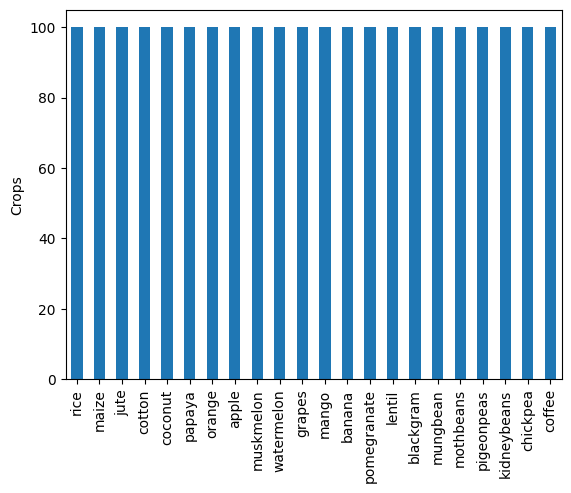

In [2]:
#We split the data using value_counts(). It seperates the different data.
import matplotlib.pyplot as plt
count = ""
count = df["label"].value_counts()

print(count)

#autocpt provides us with the percentage values
count.plot(kind = 'bar')
plt.ylabel("Crops")

print(f"No of different crops are {len(count)}")

From the above graph we know that there are 22 different types of crops and there are a 100 entires of each so we don't need any upscaling or downscaling. However the names of the data are in text form so we will convert it to integer form.

In [3]:
#Getting list of all crops
crops = count.index.tolist()

#I have converted all of the crops into codes
df['label'] = df['label'].astype('category')
df['label_codes'] = df['label'].cat.codes

#Creating a dictionary so I can decode the data in the future
unique_categories = df['label'].cat.categories
label_mapping = dict(zip(range(len(unique_categories)), unique_categories))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
 8   label_codes  2200 non-null   int8    
dtypes: category(1), float64(4), int64(3), int8(1)
memory usage: 125.4 KB


Splitting data into test and train

In [4]:
#This is the input. All columns except the not.full.paid
X = df.drop(['label', 'label_codes'],axis=1)
#not.full.paid is the output
y = df['label_codes']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit classification models
We will be using


1.   Random Forest Clasifier
2.   Multinomial Naive Bayes
3.   K-Nearest Neighbours
4.   Gradient Boosting

Importing libraries

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

Predicting the test data and evaluating the model accuracy and generating the classification report(cost of FP=FN).
Did cross validation score as the accuracy was way too high.

In [7]:
y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Accuracy Mean:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())

0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        31
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        30
           8       0.97      0.97      0.97        31
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        22
          11       0.96      1.00      0.98        27
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        34
        

Hyper parameter testing.
As I thoight the data was either over fitted or there was a data leak I re evaluated the train testing spliting process and also checked for hyper parameter testing.

In [8]:
for n_estimators in range(5,150):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    print(f"Number of Estimators: {n_estimators}, Mean Accuracy: {mean_accuracy}")

Number of Estimators: 5, Mean Accuracy: 0.985064935064935
Number of Estimators: 6, Mean Accuracy: 0.9831168831168832
Number of Estimators: 7, Mean Accuracy: 0.9870129870129869
Number of Estimators: 8, Mean Accuracy: 0.9876623376623377
Number of Estimators: 9, Mean Accuracy: 0.9935064935064937
Number of Estimators: 10, Mean Accuracy: 0.9922077922077921
Number of Estimators: 11, Mean Accuracy: 0.9941558441558442
Number of Estimators: 12, Mean Accuracy: 0.9935064935064937
Number of Estimators: 13, Mean Accuracy: 0.9941558441558442
Number of Estimators: 14, Mean Accuracy: 0.9941558441558442
Number of Estimators: 15, Mean Accuracy: 0.9954545454545454
Number of Estimators: 16, Mean Accuracy: 0.996103896103896
Number of Estimators: 17, Mean Accuracy: 0.9954545454545454
Number of Estimators: 18, Mean Accuracy: 0.996103896103896
Number of Estimators: 19, Mean Accuracy: 0.996103896103896
Number of Estimators: 20, Mean Accuracy: 0.996103896103896
Number of Estimators: 21, Mean Accuracy: 0.9961038

I will finally go with 100 estimators as I have conclueded that the chances of overfitting as very less and there is no data leak.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=34)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Accuracy Mean:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())

0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        31
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        30
           8       0.97      0.97      0.97        31
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        22
          11       0.96      1.00      0.98        27
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        34
        

## Multinomial Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Predicting the test data and evaluating the model accuracy and generating the classification report(cost of FP=FN).

In [11]:
y_pred = nb_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
scores = cross_val_score(nb_classifier, X, y, cv=5)
print("Accuracy Mean:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())

0.8924242424242425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.81      1.00      0.90        30
           2       0.70      0.74      0.72        31
           3       1.00      1.00      1.00        34
           4       1.00      0.96      0.98        26
           5       1.00      1.00      1.00        29
           6       0.87      0.96      0.92        28
           7       1.00      1.00      1.00        30
           8       0.78      1.00      0.87        31
           9       0.87      1.00      0.93        26
          10       0.72      0.82      0.77        22
          11       0.96      0.81      0.88        27
          12       0.74      0.82      0.78        28
          13       0.64      0.58      0.61        36
          14       0.91      1.00      0.95        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        34
        

## K-Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the test data and evaluating the model accuracy and generating the classification report(cost of FP=FN).


In [13]:
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
scores = cross_val_score(knn_classifier, X_test, y_test, cv=5)
print("Accuracy Mean:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())

0.9787878787878788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        30
           8       0.83      0.94      0.88        31
           9       0.87      1.00      0.93        26
          10       0.96      1.00      0.98        22
          11       1.00      0.96      0.98        27
          12       1.00      1.00      1.00        28
          13       1.00      0.97      0.99        36
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        34
        

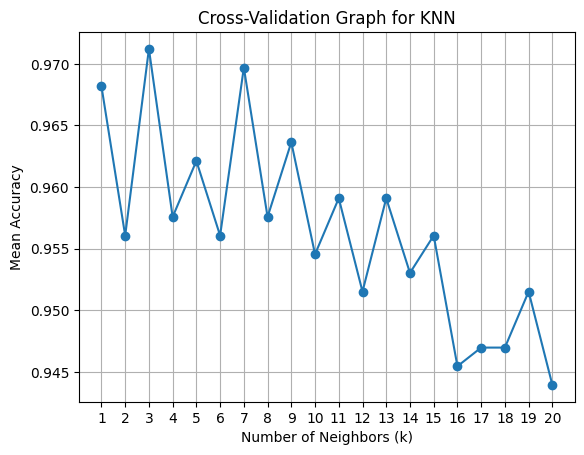

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into features (X) and labels (y)
# ...

# Define a range of k values (hyperparameter values)
k_values = range(1,21)  # Example range from 1 to 20

# Initialize an empty list to store mean accuracy values
mean_accuracies = []

# Calculate mean accuracy for each k value using cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_test, y_test, cv=5)
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

# Plot the cross-validation graph
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Cross-Validation Graph for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## GradientBoostingClassifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=4)
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=4)

Predicting the test data and evaluating the model accuracy and generating the classification report(cost of FP=FN).


In [16]:
y_pred = gb_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
scores = cross_val_score(gb_classifier, X, y, cv=5)
print("Accuracy Mean:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())

0.9878787878787879
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        31
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        30
           8       0.88      0.94      0.91        31
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        22
          11       0.96      0.96      0.96        27
          12       1.00      1.00      1.00        28
          13       1.00      0.97      0.99        36
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        34
        

# Conclusion
All the models seem to have extremely high accuracy but keeping in mind the chances for overfitting I think that Random Forest Classifier will be the best. It has low chances of overfitting compared to the others due to its low complexity and also it had very good scores in all of the tests. Also it is an ensemble method meaning it will take avg of various results which could be good in this case.

Coverting the data code into the desired output

In [18]:
# Collect user input
user_input = []
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

# Preprocess user input
user_input_df = pd.DataFrame([user_input], columns=X.columns)
user_input_preprocessed = user_input_df.values

# Make prediction using Random Forest
predicted_label = rf_classifier.predict(user_input_preprocessed)[0]
predicted_crop = label_mapping[predicted_label]

# Display results
print(f"The predicted crop is: {predicted_crop}")


Enter N: 233
Enter P: 2
Enter K: 55
Enter temperature: 88
Enter humidity: 22
Enter ph: 7
Enter rainfall: 100
The predicted crop is: coffee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
